* Absolute Temperature (in K)
* Relative Luminosity (L/Lo)
* Relative Radius (R/Ro)
* Absolute Magnitude (Mv)
* Star Color (white,Red,Blue,Yellow,yellow-orange etc)
* Spectral Class (O,B,A,F,G,K,,M)
* Star Type **(Red Dwarf, Brown Dwarf, White Dwarf, Main Sequence , SuperGiants, HyperGiants)**
* Make a multiclass logistic regression to predict the star typ

In [435]:
import pandas as pd 
import seaborn as sns 
import numpy as np 
sns.set_theme(context = 'notebook' , palette = 'seismic' , font_scale = 0.8 , style = 'darkgrid' , rc = {'figure.figsize':[16 , 7]})

In [436]:
df = pd.read_csv('Stars.csv')

In [437]:
df

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,Brown Dwarf
1,3042,0.000500,0.1542,16.60,Red,M,Brown Dwarf
2,2600,0.000300,0.1020,18.70,Red,M,Brown Dwarf
3,2800,0.000200,0.1600,16.65,Red,M,Brown Dwarf
4,1939,0.000138,0.1030,20.06,Red,M,Brown Dwarf
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Blue,O,Hypergiant
236,30839,834042.000000,1194.0000,-10.63,Blue,O,Hypergiant
237,8829,537493.000000,1423.0000,-10.73,White,A,Hypergiant
238,9235,404940.000000,1112.0000,-11.23,White,A,Hypergiant


In [438]:
df.duplicated().sum()

0

In [439]:
df.isnull().sum()

Temperature       0
L                 0
R                 0
A_M               0
Color             0
Spectral_Class    0
Type              0
dtype: int64

### let's start univariant analysis ..

In [440]:
df['Spectral_Class'].value_counts()

M    111
B     46
O     40
A     19
F     17
K      6
G      1
Name: Spectral_Class, dtype: int64

<AxesSubplot:xlabel='Spectral_Class', ylabel='count'>

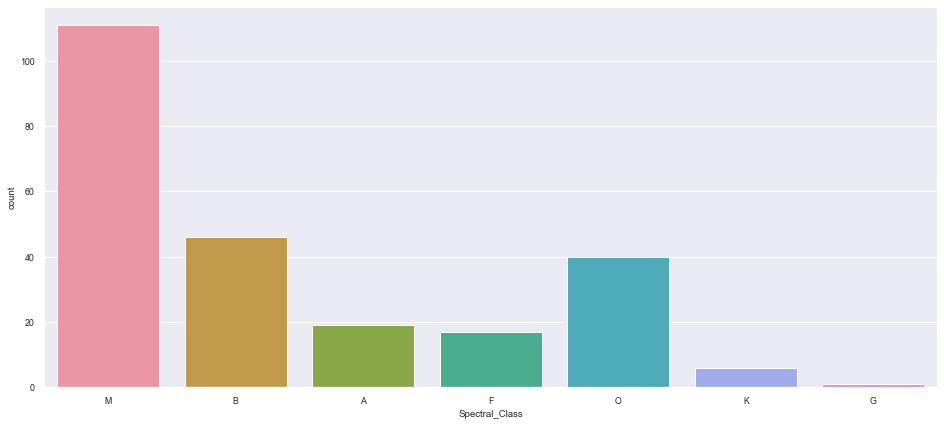

In [441]:
sns.countplot(data = df , x='Spectral_Class')

<AxesSubplot:xlabel='Type', ylabel='count'>

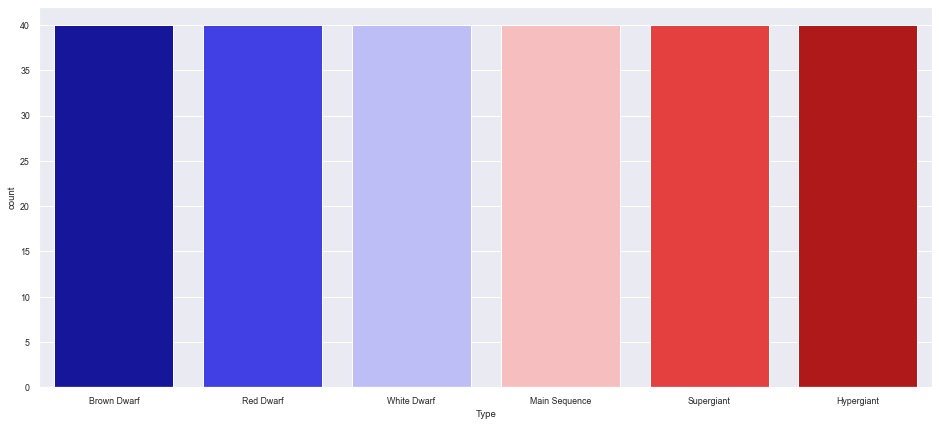

In [442]:
sns.countplot(data = df , x='Type')

In [443]:
df['Type'].value_counts()

Brown Dwarf      40
Red Dwarf        40
White Dwarf      40
Main Sequence    40
Supergiant       40
Hypergiant       40
Name: Type, dtype: int64

In [444]:
df.columns

Index(['Temperature', 'L', 'R', 'A_M', 'Color', 'Spectral_Class', 'Type'], dtype='object')

In [445]:
df['Color'].value_counts()

Red                   112
Blue                   56
Blue-white             26
Blue White             10
yellow-white            8
White                   7
Blue white              4
white                   3
Yellowish White         3
yellowish               2
Whitish                 2
Orange                  2
White-Yellow            1
Pale yellow orange      1
Yellowish               1
Orange-Red              1
Blue-White              1
Name: Color, dtype: int64

In [446]:
df.drop(['Color'] , axis = 1 , inplace=True)

In [447]:
df

,Temperature,L,R,A_M,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,M,Brown Dwarf
1,3042,0.000500,0.1542,16.60,M,Brown Dwarf
2,2600,0.000300,0.1020,18.70,M,Brown Dwarf
3,2800,0.000200,0.1600,16.65,M,Brown Dwarf
4,1939,0.000138,0.1030,20.06,M,Brown Dwarf
...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,O,Hypergiant
236,30839,834042.000000,1194.0000,-10.63,O,Hypergiant
237,8829,537493.000000,1423.0000,-10.73,A,Hypergiant
238,9235,404940.000000,1112.0000,-11.23,A,Hypergiant


In [448]:
from sklearn.preprocessing import OneHotEncoder 

In [449]:
encoder = OneHotEncoder(sparse=False , drop="first")

In [450]:
transformed_col =encoder.fit_transform(df[['Spectral_Class']])

In [451]:
transformed_df = pd.DataFrame(transformed_col , columns=encoder.get_feature_names_out())

In [452]:
df= pd.concat([df , transformed_df] , axis = 1)

In [453]:
df

,Temperature,L,R,A_M,Spectral_Class,Type,Spectral_Class_B,Spectral_Class_F,Spectral_Class_G,Spectral_Class_K,Spectral_Class_M,Spectral_Class_O
0,3068,0.002400,0.1700,16.12,M,Brown Dwarf,0.0,0.0,0.0,0.0,1.0,0.0
1,3042,0.000500,0.1542,16.60,M,Brown Dwarf,0.0,0.0,0.0,0.0,1.0,0.0
2,2600,0.000300,0.1020,18.70,M,Brown Dwarf,0.0,0.0,0.0,0.0,1.0,0.0
3,2800,0.000200,0.1600,16.65,M,Brown Dwarf,0.0,0.0,0.0,0.0,1.0,0.0
4,1939,0.000138,0.1030,20.06,M,Brown Dwarf,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,O,Hypergiant,0.0,0.0,0.0,0.0,0.0,1.0
236,30839,834042.000000,1194.0000,-10.63,O,Hypergiant,0.0,0.0,0.0,0.0,0.0,1.0
237,8829,537493.000000,1423.0000,-10.73,A,Hypergiant,0.0,0.0,0.0,0.0,0.0,0.0
238,9235,404940.000000,1112.0000,-11.23,A,Hypergiant,0.0,0.0,0.0,0.0,0.0,0.0


In [454]:
df.drop(['Spectral_Class'] , axis =1 , inplace=True)

In [455]:
df

,Temperature,L,R,A_M,Type,Spectral_Class_B,Spectral_Class_F,Spectral_Class_G,Spectral_Class_K,Spectral_Class_M,Spectral_Class_O
0,3068,0.002400,0.1700,16.12,Brown Dwarf,0.0,0.0,0.0,0.0,1.0,0.0
1,3042,0.000500,0.1542,16.60,Brown Dwarf,0.0,0.0,0.0,0.0,1.0,0.0
2,2600,0.000300,0.1020,18.70,Brown Dwarf,0.0,0.0,0.0,0.0,1.0,0.0
3,2800,0.000200,0.1600,16.65,Brown Dwarf,0.0,0.0,0.0,0.0,1.0,0.0
4,1939,0.000138,0.1030,20.06,Brown Dwarf,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Hypergiant,0.0,0.0,0.0,0.0,0.0,1.0
236,30839,834042.000000,1194.0000,-10.63,Hypergiant,0.0,0.0,0.0,0.0,0.0,1.0
237,8829,537493.000000,1423.0000,-10.73,Hypergiant,0.0,0.0,0.0,0.0,0.0,0.0
238,9235,404940.000000,1112.0000,-11.23,Hypergiant,0.0,0.0,0.0,0.0,0.0,0.0


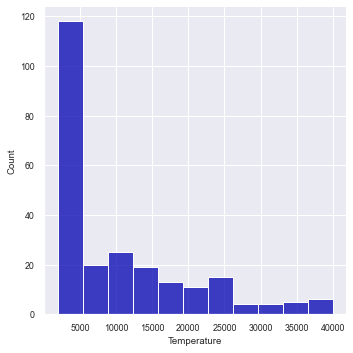

In [456]:
sns.displot(data = df , x='Temperature')

<AxesSubplot:xlabel='Temperature'>

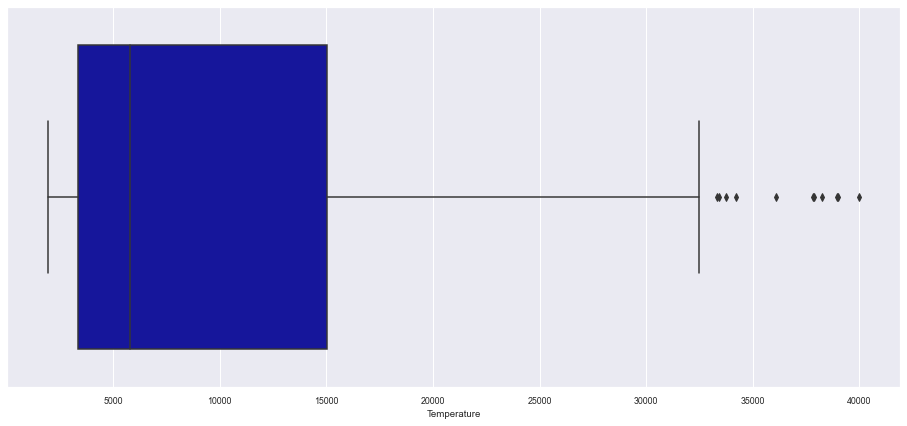

In [457]:
sns.boxplot(data = df , x='Temperature')

In [458]:
len(df[df['Temperature']<3100])

35

In [459]:
df['T'] = np.log(df['Temperature'])

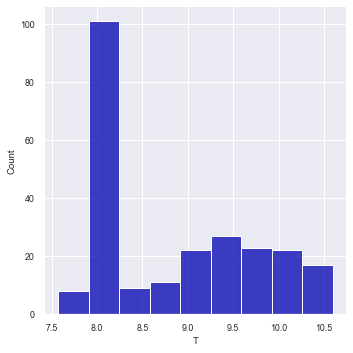

In [460]:
sns.displot(data = df , x='T')

In [461]:
df.drop('T' , axis =1 , inplace= True)

In [462]:
df

,Temperature,L,R,A_M,Type,Spectral_Class_B,Spectral_Class_F,Spectral_Class_G,Spectral_Class_K,Spectral_Class_M,Spectral_Class_O
0,3068,0.002400,0.1700,16.12,Brown Dwarf,0.0,0.0,0.0,0.0,1.0,0.0
1,3042,0.000500,0.1542,16.60,Brown Dwarf,0.0,0.0,0.0,0.0,1.0,0.0
2,2600,0.000300,0.1020,18.70,Brown Dwarf,0.0,0.0,0.0,0.0,1.0,0.0
3,2800,0.000200,0.1600,16.65,Brown Dwarf,0.0,0.0,0.0,0.0,1.0,0.0
4,1939,0.000138,0.1030,20.06,Brown Dwarf,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Hypergiant,0.0,0.0,0.0,0.0,0.0,1.0
236,30839,834042.000000,1194.0000,-10.63,Hypergiant,0.0,0.0,0.0,0.0,0.0,1.0
237,8829,537493.000000,1423.0000,-10.73,Hypergiant,0.0,0.0,0.0,0.0,0.0,0.0
238,9235,404940.000000,1112.0000,-11.23,Hypergiant,0.0,0.0,0.0,0.0,0.0,0.0


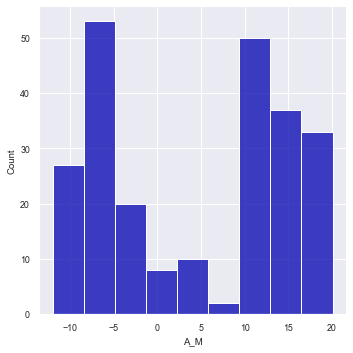

In [463]:
sns.displot(data = df , x= 'A_M')

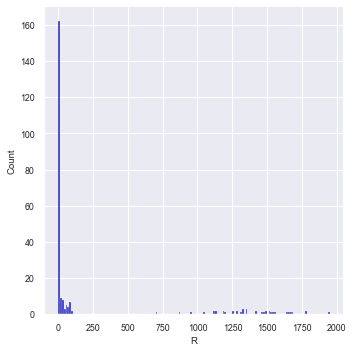

In [464]:
sns.displot(data = df , x='R')

In [465]:
from datasist.structdata import detect_outliers

In [466]:
outliers = detect_outliers(df , 0 , ['Temperature'])

In [467]:
len(outliers)

11

In [468]:
df.drop(outliers, axis = 0 , inplace=True  )

<AxesSubplot:xlabel='Temperature'>

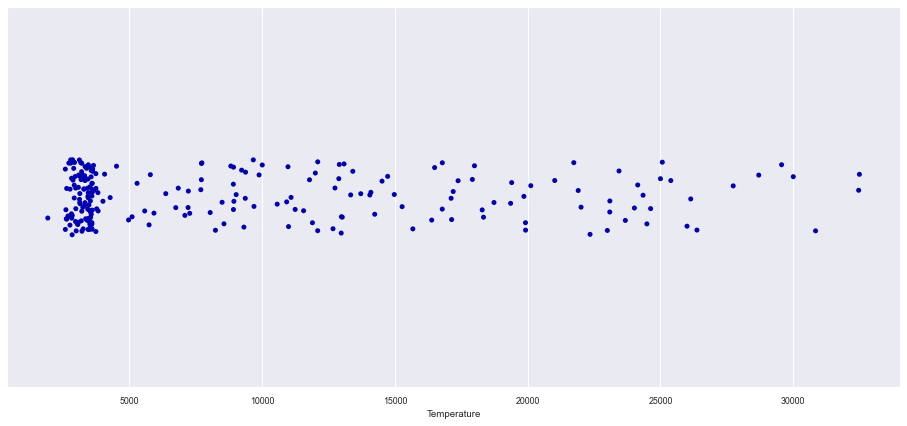

In [469]:
sns.stripplot(data = df , x='Temperature' , hue = 'Type')

In [470]:
df.describe()

,Temperature,L,R,A_M,Spectral_Class_B,Spectral_Class_F,Spectral_Class_G,Spectral_Class_K,Spectral_Class_M,Spectral_Class_O
count,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000
mean,9243.519651,97618.095163,228.252478,4.898013,0.192140,0.074236,0.004367,0.026201,0.484716,0.135371
std,7804.802166,174164.874669,507.081430,10.502291,0.394845,0.262729,0.066082,0.160082,0.500861,0.342869
min,1939.000000,0.000080,0.008400,-11.920000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3340.000000,0.000810,0.098700,-6.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4526.000000,0.012200,0.510000,10.580000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,13340.000000,173800.000000,39.000000,13.980000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,32489.000000,849420.000000,1948.500000,20.060000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [471]:
df['R'] = np.log(df['R'])

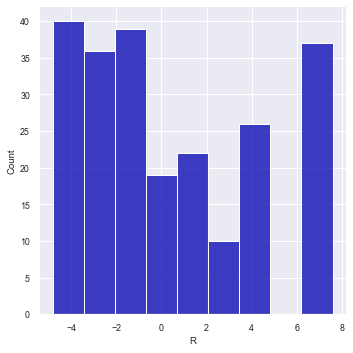

In [472]:
sns.displot(data =df , x='R')

In [473]:
from sklearn.preprocessing import LabelEncoder

In [474]:
encoder1 = LabelEncoder()

In [475]:
df['Type'] = encoder1.fit_transform(df[['Type']])

D:\anaconda\envs\epsilon_eslam\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [476]:
df

,Temperature,L,R,A_M,Type,Spectral_Class_B,Spectral_Class_F,Spectral_Class_G,Spectral_Class_K,Spectral_Class_M,Spectral_Class_O
0,3068,0.002400,-1.771957,16.12,0,0.0,0.0,0.0,0.0,1.0,0.0
1,3042,0.000500,-1.869505,16.60,0,0.0,0.0,0.0,0.0,1.0,0.0
2,2600,0.000300,-2.282782,18.70,0,0.0,0.0,0.0,0.0,1.0,0.0
3,2800,0.000200,-1.832581,16.65,0,0.0,0.0,0.0,0.0,1.0,0.0
4,1939,0.000138,-2.273026,20.06,0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
233,27739,849420.000000,7.132498,-7.59,1,1.0,0.0,0.0,0.0,0.0,0.0
234,21904,748490.000000,7.029973,-7.67,1,1.0,0.0,0.0,0.0,0.0,0.0
236,30839,834042.000000,7.085064,-10.63,1,0.0,0.0,0.0,0.0,0.0,1.0
237,8829,537493.000000,7.260523,-10.73,1,0.0,0.0,0.0,0.0,0.0,0.0


In [477]:
from sklearn.model_selection import train_test_split

In [478]:
x=df.drop(['Type'] , axis =1)
y=df['Type']

In [479]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.20 , stratify=y , random_state=7 , shuffle=True ,train_size=80 ) 

In [480]:
from sklearn.preprocessing import StandardScaler

In [481]:
scaler = StandardScaler()

In [482]:
col_to_scaled = ['A_M' , 'R','L','Temperature']

In [483]:
x_train[col_to_scaled] = scaler.fit_transform(x_train[col_to_scaled])

In [484]:
x_test[col_to_scaled]=scaler.transform(x_test[col_to_scaled])

In [485]:
from sklearn.linear_model import LogisticRegression

In [486]:
model = LogisticRegression(multi_class="ovr")

In [487]:
model.fit(x_train , y_train)

LogisticRegression(multi_class='ovr')

In [488]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

In [489]:
from sklearn.metrics import accuracy_score , confusion_matrix , ConfusionMatrixDisplay

In [490]:
print("test accuracy is" , accuracy_score(y_test , y_test_pred))
print("train accuracy is" , accuracy_score(y_train , y_train_pred))

test accuracy is 0.9130434782608695
train accuracy is 0.95


In [491]:
cm = confusion_matrix(y_test , y_test_pred)

In [492]:
cm

array([[8, 0, 0, 0, 0, 0],
       [0, 7, 0, 0, 1, 0],
       [0, 0, 6, 0, 1, 0],
       [1, 0, 0, 7, 0, 0],
       [0, 1, 0, 0, 6, 0],
       [0, 0, 0, 0, 0, 8]], dtype=int64)

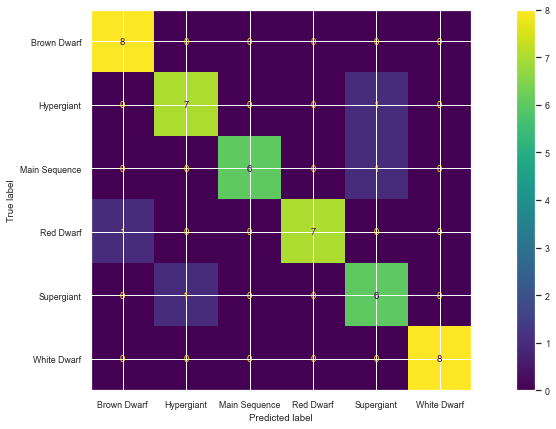

In [493]:
ConfusionMatrixDisplay(cm , display_labels=encoder1.inverse_transform(model.classes_)).plot()

In [494]:
from sklearn.preprocessing import PolynomialFeatures

In [495]:
poly_trans = PolynomialFeatures(degree=3)

In [496]:
x_train = poly_trans.fit_transform(x_train)

In [497]:
model.fit(x_train , y_train)

LogisticRegression(multi_class='ovr')

In [502]:
y_train_pred1 = model.predict(x_train)
y_test_pred1 = model.predict(poly_trans.transform(x_test))
print("Train accuracy is " , accuracy_score(y_train , y_train_pred1))
print("Test accuracy is " , accuracy_score(y_test , y_test_pred1))

Train accuracy is  1.0
Test accuracy is  0.9782608695652174


In [503]:
cm = confusion_matrix(y_test , y_test_pred1)

In [504]:
cm

array([[8, 0, 0, 0, 0, 0],
       [0, 8, 0, 0, 0, 0],
       [0, 0, 6, 0, 1, 0],
       [0, 0, 0, 8, 0, 0],
       [0, 0, 0, 0, 7, 0],
       [0, 0, 0, 0, 0, 8]], dtype=int64)

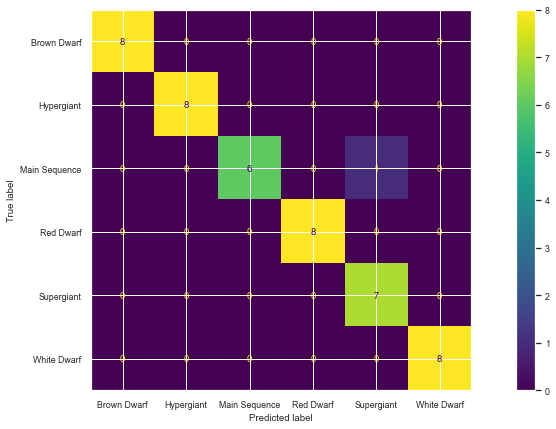

In [505]:
ConfusionMatrixDisplay(cm , display_labels=encoder1.inverse_transform(model.classes_)).plot()